In [1]:
import math
import os.path as path
import numpy as np
import pandas as pd

In [2]:
train = pd.read_json("../train.json")
test = pd.read_json("../test.json")

In [3]:
test.columns

Index(['band_1', 'band_2', 'id', 'inc_angle'], dtype='object')

In [4]:
test.inc_angle

0       34.966400
1       32.615072
2       37.505433
3       34.473900
4       43.918874
5       35.933020
6       42.414200
7       33.638300
8       41.107600
9       34.966400
10      35.782900
11      35.566871
12      33.185400
13      40.111298
14      39.698577
15      41.797300
16      43.603612
17      38.366264
18      44.988231
19      34.471800
20      44.678233
21      35.658800
22      35.408018
23      42.519800
24      45.247800
25      42.596474
26      45.366800
27      45.745633
28      44.066330
29      38.458900
          ...    
8394    36.630178
8395    37.349600
8396    40.945086
8397    45.768387
8398    45.017845
8399    43.134848
8400    31.436800
8401    41.859000
8402    42.291188
8403    38.125152
8404    39.461325
8405    30.585100
8406    39.225076
8407    38.825700
8408    43.679004
8409    37.259800
8410    38.153500
8411    46.326263
8412    38.020000
8413    40.644460
8414    39.234395
8415    43.107674
8416    41.858200
8417    45.963624
8418    45

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.hist(test.inc_angle, normed=True, bins=30)
plt.ylabel('Probability');

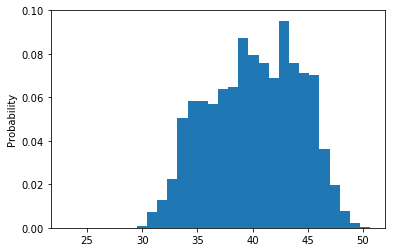

In [7]:
plt.show()

In [ ]:
#train.inc_angle = train.inc_angle.apply(lambda v: v = np.random.normal(37.5, 3.75, 1)[0] if v == 'na')
#train.inc_angle = train.inc_angle.astype(float).fillna(np.random.normal(37.5, 3.75, 1)[0])
for i in range(0, train.inc_angle.size):
    if str(train.inc_angle[i]) == 'na':
        train.inc_angle[i] = np.random.normal(37.5, 3.75, 1)[0]
plt.hist(train.inc_angle, normed = True, bins = 30)
plt.ylabel('Probability');
plt.show()

/home/joseph/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
test.shape

(8424, 4)

In [9]:
train.shape

(1604, 5)

In [11]:
print(test[:, :, :, 1])

TypeError: unhashable type: 'slice'

In [12]:
def load_and_format(in_path):
    out_df = pd.read_json(in_path)
    out_images = out_df.apply(lambda c_row: [np.stack([c_row['band_1'],c_row['band_2']], -1).reshape((75,75,2))],1)
    out_images = np.stack(out_images).squeeze()
    return out_df, out_images
dir_path = path.abspath(path.join('__file__',"../.."))
train_path = "../train.json"
test_path =  "../test.json"
test_df, test_images = load_and_format(test_path)

In [13]:
test_images.shape

(8424, 75, 75, 2)